In [2]:
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
x_train = np.linspace(-1, 1, 101)

In [5]:
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33

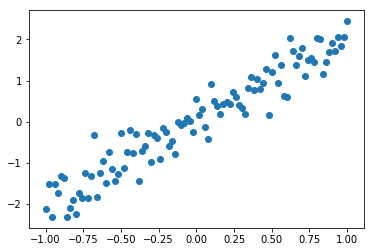

In [6]:
plt.scatter(x_train, y_train)
plt.show()

### Solving Linear Regression

In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

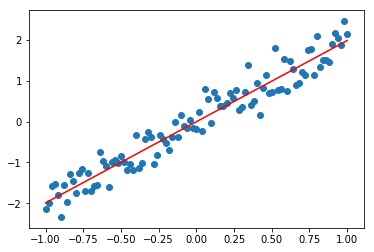

In [10]:
learning_rate = 0.01
#Define some contants used by the learning algorithms. hyper-parameters.
training_epochs = 100

#Setup fake data.
x_train = np.linspace(-1, 1, 101)
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33 

#Setup the input and output nodes as placeholders. 
X = tf.placeholder("float")
Y = tf.placeholder("float")

#Define model as y = w*x
def model(X, w):
    return tf.multiply(X, w)

#Setup weight variable
w = tf.Variable(0.0, name="weights")
y_model = model(X, w)

#Define cost model
cost = tf.square(Y-y_model)

#Define the operation that will be called on each iteration of the learning algorithm
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

#Setup session and initialize all variables.
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

#Loop through the dataset multiple times
for epoch in range(training_epochs):
    #Loop through each item in datasets. 
    for (x, y) in zip(x_train, y_train):
        #Update the model parameter(s) to minimize the cost function.
        sess.run(train_op, feed_dict={X: x, Y: y})

#Obtain the final parameter value
w_val = sess.run(w)

#Close the session
sess.close()

#Plot the original data
plt.scatter(x_train, y_train)

#Plot the best fit line
y_learned = x_train * w_val
plt.plot(x_train, y_learned, 'r')
plt.show()

### Polynomial Model

In [12]:
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
#Initialize the hyper-parameters
learning_rate = 0.01 ❶
training_epochs = 40 ❶

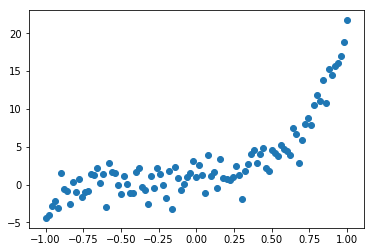

In [13]:
#Setup some fake raw input data. 
trX = np.linspace(-1, 1, 101)

#Set up raw output data based on a degree 5 polynomial
num_coeffs = 6
trY_coeffs = [1, 2, 3, 4, 5, 6]
trY = 0 
for i in range(num_coeffs): 
    trY += trY_coeffs[i] * np.power(trX, i) 

#Add some noise
trY += np.random.randn(*trX.shape) * 1.5
#Show a scatter plot
plt.scatter(trX, trY)
plt.show()


[ 0.78526884  1.69969082  4.10711765  4.11936426  3.6881628   6.12769938]


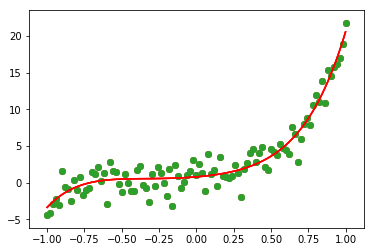

In [17]:
#Define the nodes to hold values for input/output pairs.
X = tf.placeholder("float")
Y = tf.placeholder("float")

#Define our polynomial model 
def model(X, w):
    terms = []
    for i in range(num_coeffs):
        term = tf.multiply(w[i], tf.pow(X, i))
        terms.append(term)
    return tf.add_n(terms)

#Setup the parameter vector all to zeros
w = tf.Variable([0.] * num_coeffs, name="parameters")
y_model = model(X, w)

#Degine the cost function.
cost = (tf.pow(Y-y_model, 2)) 
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 

#Setup session and run the learning algorithm.
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) 

for epoch in range(training_epochs):
    for (x, y) in zip(trX, trY):
        sess.run(train_op, feed_dict={X: x, Y: y})
        
w_val = sess.run(w)
print(w_val)

#Close the session when done.
sess.close() 

#Plot the result
plt.scatter(trX, trY) 
trY2 = 0 
for i in range(num_coeffs): 
    trY2 += w_val[i] * np.power(trX, i) 
    
plt.plot(trX, trY2, 'r')
plt.show()

### Regularization